In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(','.join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

no_features = 1000

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()
no_topics = 20
# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)
word_topic_dist = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]



Topic 0:
people,gun,state,control,right,guns,crime,states,law,police
Topic 1:
time,question,book,years,did,like,don,space,answer,just
Topic 2:
mr,line,rules,science,stephanopoulos,title,current,define,int,yes
Topic 3:
key,chip,keys,clipper,encryption,number,des,algorithm,use,bit
Topic 4:
edu,com,cs,vs,w7,cx,mail,uk,17,send
Topic 5:
use,does,window,problem,way,used,point,different,case,value
Topic 6:
windows,thanks,know,help,db,does,dos,problem,like,using
Topic 7:
bike,water,effect,road,design,media,dod,paper,like,turn
Topic 8:
don,just,like,think,know,people,good,ve,going,say
Topic 9:
car,new,price,good,power,used,air,sale,offer,ground
Topic 10:
file,available,program,edu,ftp,information,files,use,image,version
Topic 11:
ax,max,b8f,g9v,a86,145,pl,1d9,0t,34u
Topic 12:
government,law,privacy,security,legal,encryption,court,fbi,technology,information
Topic 13:
card,bit,memory,output,video,color,data,mode,monitor,16
Topic 14:
drive,scsi,disk,mac,hard,apple,drives,controller,software,port
T

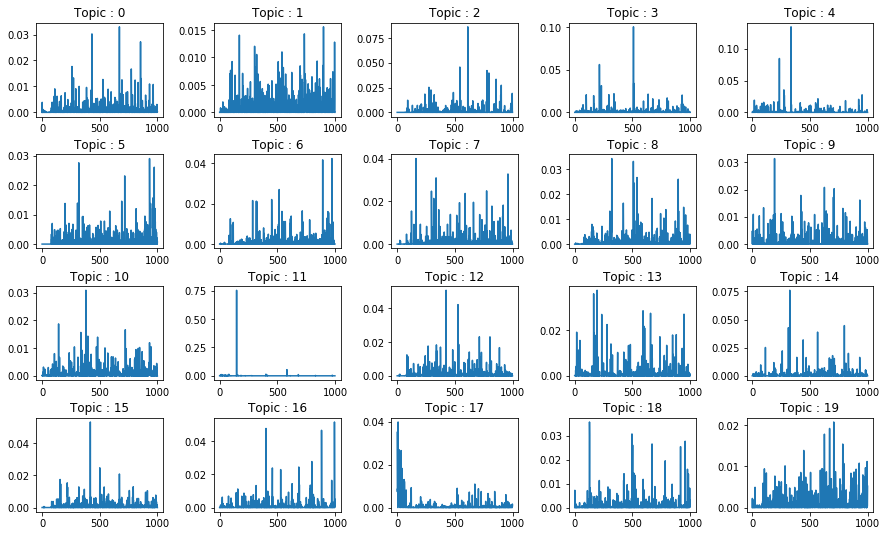

In [2]:
n_rows=4
n_cols = 5
x = np.arange(0,1000,1)
fig,ax = plt.subplots(nrows=n_rows,ncols = n_cols)
for i_index,i in enumerate(ax):
    for j_index, j in enumerate(i):
        i[j_index].plot(x,word_topic_dist[i_index*n_cols + j_index]) 
        i[j_index].set_title('Topic : '+str(i_index*n_cols + j_index)) 
fig.subplots_adjust(hspace=0.4)  
fig.subplots_adjust(wspace=0.4)  
fig.set_figheight(9)
fig.set_figwidth(15)
fig.savefig('test.pdf', format='pdf') 
plt.show()  

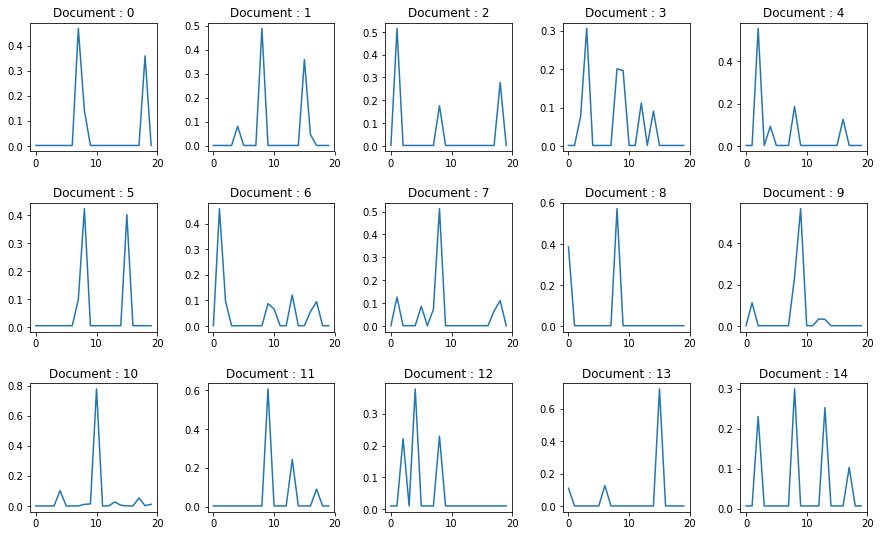

In [3]:
lda_doc_topic = lda.transform(tf)
n_rows=3
n_cols = 5
x = np.arange(0,20,1)
fig,ax = plt.subplots(nrows=n_rows,ncols = n_cols)
for i_index,i in enumerate(ax):
    for j_index, j in enumerate(i):
        i[j_index].plot(x,lda_doc_topic[i_index*n_cols + j_index]) 
        i[j_index].set_title('Document : '+str(i_index*n_cols + j_index)) 
fig.subplots_adjust(hspace=0.4)  
fig.subplots_adjust(wspace=0.4)  
fig.set_figheight(9)
fig.set_figwidth(15)
fig.savefig('doc_topic_dist.pdf', format='pdf') 
plt.show()  